In [1]:
import heapq
import math
import time

import matplotlib.pyplot as plt
import numpy as np

In [2]:
ALGORITHM = 1

Puzzle_Number = 9
NUM_ROW = 3
# NUM_ROW = int(math.sqrt(Puzzle_Number + 1))

In [3]:
class Node:
    def __init__(self, state, goal, parent=None, action=None, path_cost=0):
        self.state = state  # state of current node, a specific permutation
        self.parent = parent  # parent node in solution path
        self.action = action  # available action of current node: left, right, up, or down
        self.path_cost = path_cost  # g(n)

        # h(n): pick one of three
        if ALGORITHM == 1:
            self.heuristic_cost = self.UniformCostSearch()
        elif ALGORITHM == 2:
            self.heuristic_cost = self.MisplacedTileHeuristic(goal)
        else:
            self.heuristic_cost = self.ManhattanDistance(goal)
        
        # f(n) = g(n) + h(n)
        self.total_cost = self.path_cost + self.heuristic_cost  

    # Base on f(n), define a < comparison between two nodes, self and other
    # Use in the priority queue to determine the ejection order of nodes
    def __lt__(self, other):
        return self.total_cost < other.total_cost
    
    # Uniform Cost Search
    def UniformCostSearch(self):
        return 0
    
    # Manhattan Distance heuristic
    def ManhattanDistance(self, goal):
        state = self.state
        distance = 0
        # iterate each tiles, and count distance from current position to goal position
        for i in range(len(state)):
            if state[i] != 0:  # omit 0
                target_index = goal.index(state[i])
                # calculate horizontal distance + vertical distance
                distance += abs(target_index % NUM_ROW - i % NUM_ROW) + abs(target_index // NUM_ROW - i // NUM_ROW)
        
        return distance
    
    # Misplaced Tile Heuristic
    def MisplacedTileHeuristic(self, goal):
        state = self.state
        misplaced_count = 0

        # count how many tiles are not in goal positions
        for i in range(len(state)):
            if state[i] != 0 and state[i] != goal[i]:  # omit 0
                misplaced_count += 1
        
        return misplaced_count

In [4]:
# Swap positions of two elements in state
def swap(state, i, j):
    state[i], state[j] = state[j], state[i]
    return state

In [5]:
# Returen available location for 0 moving to
def possible_moves(state):
    moves = []
    # current location of 0
    index = state.index(0)  

    # Judge available location
    # 0 is not in the first column: can be shifted to the left
    if index % NUM_ROW != 0:  
        moves.append(index - 1)
    # 0 is not in the last column: can be shifted to the right
    if index % NUM_ROW != NUM_ROW - 1:  
        moves.append(index + 1)
    # 0 is not in the first row: can be moved up
    if index >= NUM_ROW:  
        moves.append(index - NUM_ROW)
    # 0 is not in the first row: can be moved down
    if index < NUM_ROW * (NUM_ROW - 1):  
        moves.append(index + NUM_ROW)

    return moves

In [6]:
# print solution path
def print_solution(node):
    # initialize
    path = []

    # get path and store in node
    while node:
        path.append(node)
        node = node.parent
    
    # print steps one by one
    number = 1
    for step in path[::-1]:
        state = step.state
        
        print(f"State {number}: ")

        for x in range(NUM_ROW):
            for y in range(NUM_ROW):
                print(f"{state[x * NUM_ROW + y]}", end=' ')
            print(" ")

        print(f"g(n): {step.path_cost}, h(n): {step.heuristic_cost}\n")

        number += 1

In [7]:
# Expand current node: try every possible move
def expand(node, goal):
    successors = []
    # location fo 0    
    index = node.state.index(0)
    # get every possible move
    moves = possible_moves(node.state)

    # do all possible moves to current node
    for move in moves:
        # copy
        new_state = node.state[:]  
        # move
        swap(new_state, index, move)  
        # create sub_node
        new_node = Node(new_state, goal, node, path_cost=node.path_cost + 1)  
        # add sub_node to successors
        successors.append(new_node)  
    
    return successors

In [8]:
# # 实现A*搜索算法，寻找从初始状态到目标状态的路径
# def a_star_search(initial, goal):
#     # 创建初始节点
#     initial_node = Node(initial, goal)  

#     # 将初始节点加入前沿队列
#     frontier = []  # 前沿队列，用于存储待探索的节点
#     heapq.heappush(frontier, initial_node)  
    
#     explored = set()  # 已探索集合
#     while frontier:
#         # 取出并删除前沿队列中路径成本最小的节点
#         node = heapq.heappop(frontier)  

#         # 检查当前节点的状态是否是目标状态
#         if node.state == goal:  
#             return node
        
#         # 将当前状态添加到已探索集
#         explored.add(tuple(node.state))  
        
#         # iterate all successors of current node
#         for successor in expand(node, goal):  # 生成所有后继节点
#             # 将未探索的后继节点加入前沿队列
#             if tuple(successor.state) not in explored:
#                 heapq.heappush(frontier, successor)  
#     return None

# A* Search: General Function
def a_star_search(initial, goal):
    # initialize
    initial_node = Node(initial, goal)
    num_nodes_expanded = 0  
    max_queue_size = 1
    
    # Add the initial node to the frontier queue
    frontier = []  # Store the nodes to be explored
    heapq.heappush(frontier, initial_node)
    
    explored = set()  # explored nodes set
    while frontier:
        # pop out and delete node with the minimum f(n) in the frontier
        node = heapq.heappop(frontier)
        num_nodes_expanded += 1 # renew num_nodes_expanded

        # Is goal?
        if node.state == goal:
            # print
            print(f"Number of nodes expanded: {num_nodes_expanded}")
            print(f"Max queue size: {max_queue_size}")
            return node, num_nodes_expanded, max_queue_size

        # Add to explored nodes set
        explored.add(tuple(node.state))

        # iterate all successors of current node
        for successor in expand(node, goal):    # Generate all successors
            # pop in all successors to frontier
            if tuple(successor.state) not in explored:
                heapq.heappush(frontier, successor)

                # renew max_queue_size
                if len(frontier) > max_queue_size:
                    max_queue_size = len(frontier)
                    
    return None, num_nodes_expanded, max_queue_size


In [9]:
# initial_state = [7, 1, 2, 
#                  4, 8, 5, 
#                  6, 3, 0]


# initial_state = [1, 2, 3, 
#                  4, 5, 6, 
#                  0, 7, 8]
# depth = 4
# initial_state = [1, 2, 3, 
#                  5, 0, 6, 
#                  4, 7, 8]
# depth = 8
# initial_state = [1, 3, 6, 5, 0, 2, 4, 7, 8]
# # depth = 12
# initial_state = [1, 3, 6, 5, 0, 7, 4, 8, 2]
# # depth = 16
# initial_state = [1, 6, 7, 5, 0, 3, 4, 8, 2]
# # depth = 20
# initial_state = [7, 1, 2, 4, 8, 5, 6, 3, 0]
# # depth = 24
# initial_state = [0, 7, 2, 4, 6, 1, 3, 5, 8]

# # depth = 2
# initial_state = [1, 2, 3, 4, 5, 6, 0, 7, 8]

# # depth = 2
# initial_state = [1, 2, 3, 4,
#                  5, 6, 7, 8,
#                  9, 10, 11, 12,
#                  13, 0, 14, 15]

# goal_state = [1, 2, 3, 4,
#               5, 6, 7, 8,
#               9, 10, 11, 12,
#               13, 14, 15, 0]

Depth = [2, 4, 8, 12, 16, 20, 24]

Root_Node_Set = []
Root_Node_Set.append([1, 2, 3, 4, 5, 6, 0, 7, 8])
Root_Node_Set.append([1, 2, 3, 5, 0, 6, 4, 7, 8])
Root_Node_Set.append([1, 3, 6, 5, 0, 2, 4, 7, 8])
Root_Node_Set.append([1, 3, 6, 5, 0, 7, 4, 8, 2])
Root_Node_Set.append([1, 6, 7, 5, 0, 3, 4, 8, 2])
Root_Node_Set.append([7, 1, 2, 4, 8, 5, 6, 3, 0])
Root_Node_Set.append([0, 7, 2, 4, 6, 1, 3, 5, 8])

size = len(Root_Node_Set)

In [10]:
goal_state = [1, 2, 3, 
              4, 5, 6, 
              7, 8, 0]

In [11]:
# automatically detect and fit the puzzle’s size
Puzzle_Number = len(goal_state)
NUM_ROW = int(math.sqrt(Puzzle_Number + 1))

In [12]:
# Uniform Cost Search
print("Uniform Cost Search: ")

Nodes_Expand_UCS = []
Max_Queue_Size_UCS = []
Time_UCS = []


for x in range(size):
    print(f"\nDepth = {Depth[x]}")
    # starting time
    start_time = time.time()

    # excute A* search and return solution, num_nodes_expanded, max_queue_size
    solution, num_nodes_expanded, max_queue_size= a_star_search(Root_Node_Set[x], goal_state)

    # ending time
    end_time = time.time()

    # execution time
    execution_time = end_time - start_time

    Nodes_Expand_UCS.append(num_nodes_expanded)
    Max_Queue_Size_UCS.append(max_queue_size)
    Time_UCS.append(execution_time)
    
    print("Execution time: {:.6f} seconds\n".format(execution_time))

    if solution:
        print_solution(solution)
    else:
        print("No solution found.")

Uniform Cost Search: 

Depth = 2
Number of nodes expanded: 4
Max queue size: 4
Execution time: 0.000026 seconds

State 1: 
1 2 3  
4 5 6  
0 7 8  
g(n): 0, h(n): 0

State 2: 
1 2 3  
4 5 6  
7 0 8  
g(n): 1, h(n): 0

State 3: 
1 2 3  
4 5 6  
7 8 0  
g(n): 2, h(n): 0


Depth = 4
Number of nodes expanded: 37
Max queue size: 32
Execution time: 0.000126 seconds

State 1: 
1 2 3  
5 0 6  
4 7 8  
g(n): 0, h(n): 0

State 2: 
1 2 3  
0 5 6  
4 7 8  
g(n): 1, h(n): 0

State 3: 
1 2 3  
4 5 6  
0 7 8  
g(n): 2, h(n): 0

State 4: 
1 2 3  
4 5 6  
7 0 8  
g(n): 3, h(n): 0

State 5: 
1 2 3  
4 5 6  
7 8 0  
g(n): 4, h(n): 0


Depth = 8
Number of nodes expanded: 239
Max queue size: 155
Execution time: 0.001463 seconds

State 1: 
1 3 6  
5 0 2  
4 7 8  
g(n): 0, h(n): 0

State 2: 
1 3 6  
5 2 0  
4 7 8  
g(n): 1, h(n): 0

State 3: 
1 3 0  
5 2 6  
4 7 8  
g(n): 2, h(n): 0

State 4: 
1 0 3  
5 2 6  
4 7 8  
g(n): 3, h(n): 0

State 5: 
1 2 3  
5 0 6  
4 7 8  
g(n): 4, h(n): 0

State 6: 
1 2 3  
0 5 6

In [13]:
# Misplaced Tile Heuristic
ALGORITHM = 2
print("Misplaced Tile Heuristic: \n")

Nodes_Expand_AMTH = []
Max_Queue_Size_AMTH = []
Time_AMTH = []


for x in range(size):
    print(f"\nDepth = {Depth[x]}")
    # starting time
    start_time = time.time()

    # excute A* search and return solution, num_nodes_expanded, max_queue_size
    solution, num_nodes_expanded, max_queue_size= a_star_search(Root_Node_Set[x], goal_state)

    # ending time
    end_time = time.time()

    # execution time
    execution_time = end_time - start_time

    Nodes_Expand_AMTH.append(num_nodes_expanded)
    Max_Queue_Size_AMTH.append(max_queue_size)
    Time_AMTH.append(execution_time)
    
    print("Execution time: {:.6f} seconds\n".format(execution_time))

    if solution:
        print_solution(solution)
    else:
        print("No solution found.")

# # 开始测量时间
# start_time = time.time()

# # 运行A*搜索
# solution = a_star_search(initial_state, goal_state)

# # 结束测量时间
# end_time = time.time()

# # 计算运行时间
# execution_time = end_time - start_time
# print("Execution time of a_star_search(): {:.6f} seconds\n".format(execution_time))

# # 如果找到解决方案，打印所有中间状态及其成本
# if solution:
#     print_solution(solution)
# else:
#     print("No solution found.")

Misplaced Tile Heuristic: 


Depth = 2
Number of nodes expanded: 3
Max queue size: 3
Execution time: 0.000037 seconds

State 1: 
1 2 3  
4 5 6  
0 7 8  
g(n): 0, h(n): 2

State 2: 
1 2 3  
4 5 6  
7 0 8  
g(n): 1, h(n): 1

State 3: 
1 2 3  
4 5 6  
7 8 0  
g(n): 2, h(n): 0


Depth = 4
Number of nodes expanded: 5
Max queue size: 6
Execution time: 0.000028 seconds

State 1: 
1 2 3  
5 0 6  
4 7 8  
g(n): 0, h(n): 4

State 2: 
1 2 3  
0 5 6  
4 7 8  
g(n): 1, h(n): 3

State 3: 
1 2 3  
4 5 6  
0 7 8  
g(n): 2, h(n): 2

State 4: 
1 2 3  
4 5 6  
7 0 8  
g(n): 3, h(n): 1

State 5: 
1 2 3  
4 5 6  
7 8 0  
g(n): 4, h(n): 0


Depth = 8
Number of nodes expanded: 19
Max queue size: 16
Execution time: 0.000096 seconds

State 1: 
1 3 6  
5 0 2  
4 7 8  
g(n): 0, h(n): 7

State 2: 
1 3 6  
5 2 0  
4 7 8  
g(n): 1, h(n): 7

State 3: 
1 3 0  
5 2 6  
4 7 8  
g(n): 2, h(n): 6

State 4: 
1 0 3  
5 2 6  
4 7 8  
g(n): 3, h(n): 5

State 5: 
1 2 3  
5 0 6  
4 7 8  
g(n): 4, h(n): 4

State 6: 
1 2 3  
0 5

In [14]:
# Manhattan Distance heuristic
ALGORITHM = 3
print("Manhattan Distance heuristic: \n")

Nodes_Expand_AMDH = []
Max_Queue_Size_AMDH = []
Time_AMDH = []


for x in range(size):
    print(f"\nDepth = {Depth[x]}")
    # starting time
    start_time = time.time()

    # excute A* search and return solution, num_nodes_expanded, max_queue_size
    solution, num_nodes_expanded, max_queue_size= a_star_search(Root_Node_Set[x], goal_state)

    # ending time
    end_time = time.time()

    # execution time
    execution_time = end_time - start_time

    Nodes_Expand_AMDH.append(num_nodes_expanded)
    Max_Queue_Size_AMDH.append(max_queue_size)
    Time_AMDH.append(execution_time)
    
    print("Execution time: {:.6f} seconds\n".format(execution_time))
    
    if solution:
        print_solution(solution)
    else:
        print("No solution found.")

# # 开始测量时间
# start_time = time.time()

# # 运行A*搜索
# solution = a_star_search(initial_state, goal_state)

# # 结束测量时间
# end_time = time.time()

# # 计算运行时间
# execution_time = end_time - start_time
# print("Execution time of a_star_search(): {:.6f} seconds\n".format(execution_time))

# # 如果找到解决方案，打印所有中间状态及其成本
# if solution:
#     print_solution(solution)
# else:
#     print("No solution found.")

Manhattan Distance heuristic: 


Depth = 2
Number of nodes expanded: 3
Max queue size: 3
Execution time: 0.000049 seconds

State 1: 
1 2 3  
4 5 6  
0 7 8  
g(n): 0, h(n): 2

State 2: 
1 2 3  
4 5 6  
7 0 8  
g(n): 1, h(n): 1

State 3: 
1 2 3  
4 5 6  
7 8 0  
g(n): 2, h(n): 0


Depth = 4
Number of nodes expanded: 5
Max queue size: 6
Execution time: 0.000045 seconds

State 1: 
1 2 3  
5 0 6  
4 7 8  
g(n): 0, h(n): 4

State 2: 
1 2 3  
0 5 6  
4 7 8  
g(n): 1, h(n): 3

State 3: 
1 2 3  
4 5 6  
0 7 8  
g(n): 2, h(n): 2

State 4: 
1 2 3  
4 5 6  
7 0 8  
g(n): 3, h(n): 1

State 5: 
1 2 3  
4 5 6  
7 8 0  
g(n): 4, h(n): 0


Depth = 8
Number of nodes expanded: 13
Max queue size: 12
Execution time: 0.000114 seconds

State 1: 
1 3 6  
5 0 2  
4 7 8  
g(n): 0, h(n): 8

State 2: 
1 3 6  
5 2 0  
4 7 8  
g(n): 1, h(n): 7

State 3: 
1 3 0  
5 2 6  
4 7 8  
g(n): 2, h(n): 6

State 4: 
1 0 3  
5 2 6  
4 7 8  
g(n): 3, h(n): 5

State 5: 
1 2 3  
5 0 6  
4 7 8  
g(n): 4, h(n): 4

State 6: 
1 2 3  

In [15]:
# goal_node = [1, 2, 3, 
#              4, 5, 6, 
#              7, 8, 0]
# root_node = []
# root_node.append([1,2,3,4,5,6,7,8,0])


# Depth = [2, 4, 8, 12, 16, 20, 24]

# Nodes_Expand_UCS = [4, 37, 239, 2072, 14585, 57436, 254237]
# Nodes_Expand_AMTH = [3, 5, 19, 122, 635, 2658, 20520]
# Nodes_Expand_AMDH = [3, 5, 13, 33, 97, 370, 801]

# Max_Queue_Size_UCS = [4, 32, 155, 1274, 8318, 29291, 71272]
# Max_Queue_Size_AMTH = [3, 6, 16, 90, 412, 1647, 10954]
# Max_Queue_Size_AMDH = [3, 6, 12, 26, 64, 237, 495]

# Time_UCS = [0.000050, 0.000160, 0.000962, 0.009454, 0.106435, 0.416825, 2.071211]
# Time_AMTH = [0.000044, 0.000053, 0.000134, 0.000675, 0.003606, 0.017110, 0.136470]
# Time_AMDH = [0.000059, 0.000080, 0.000152, 0.000299, 0.000908, 0.003656, 0.007218]

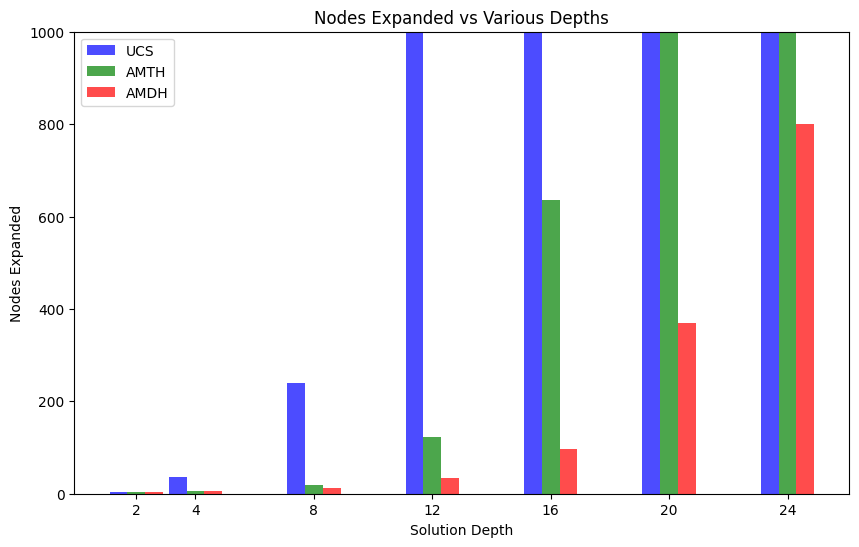

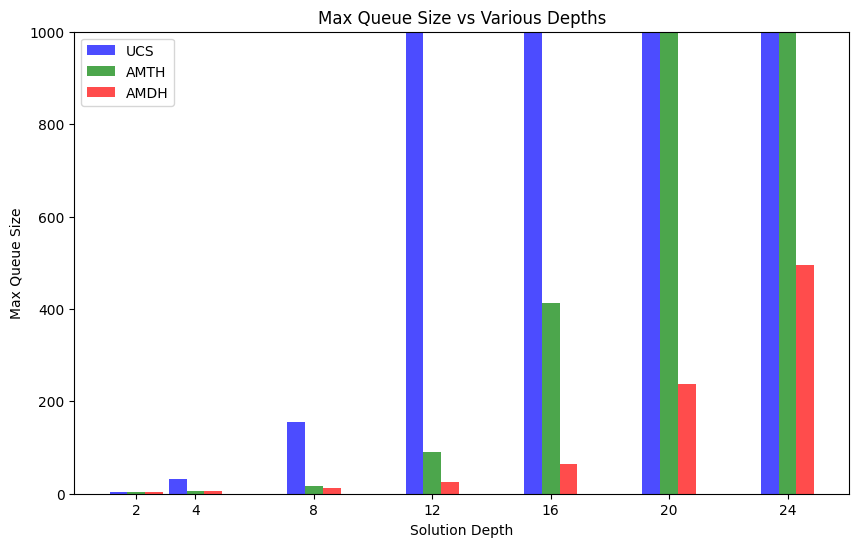

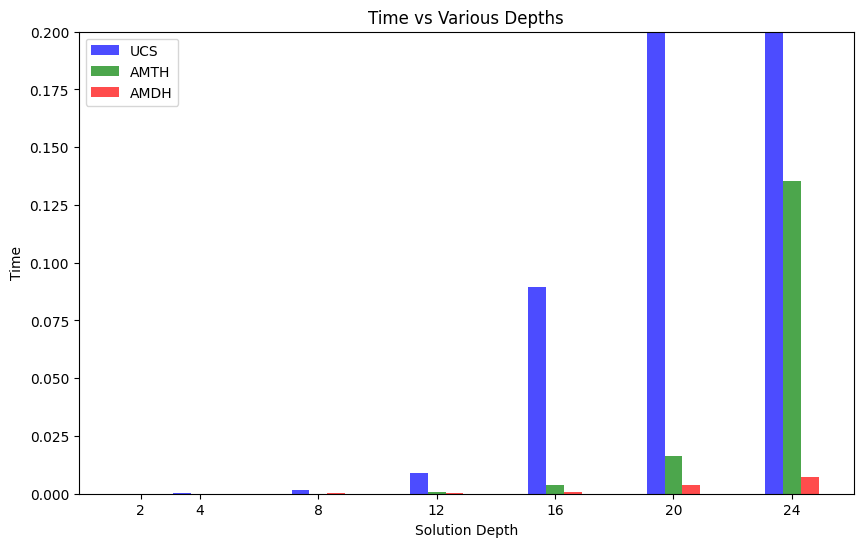

In [16]:
# 设置柱状图的宽度
width = 0.6  # 更窄的宽度以避免重叠

# 第一张柱状图：Nodes Expanded
plt.figure(figsize=(10, 6))
plt.bar(np.array(Depth) - width, Nodes_Expand_UCS, width=width, label='UCS', color='blue', alpha=0.7)
plt.bar(Depth, Nodes_Expand_AMTH, width=width, label='AMTH', color='green', alpha=0.7)
plt.bar(np.array(Depth) + width, Nodes_Expand_AMDH, width=width, label='AMDH', color='red', alpha=0.7)
plt.xlabel('Solution Depth')
plt.ylabel('Nodes Expanded')
plt.title('Nodes Expanded vs Various Depths')
plt.xticks(Depth)
plt.ylim(0, 1000)  # 设置y轴上限为500
plt.legend()



# 第二张柱状图：Max Queue Size
plt.figure(figsize=(10, 6))
plt.bar(np.array(Depth) - width, Max_Queue_Size_UCS, width=width, label='UCS', color='blue', alpha=0.7)
plt.bar(Depth, Max_Queue_Size_AMTH, width=width, label='AMTH', color='green', alpha=0.7)
plt.bar(np.array(Depth) + width, Max_Queue_Size_AMDH, width=width, label='AMDH', color='red', alpha=0.7)
plt.xlabel('Solution Depth')
plt.ylabel('Max Queue Size')
plt.title('Max Queue Size vs Various Depths')
plt.xticks(Depth)
plt.ylim(0, 1000)  # 设置y轴上限为500
plt.legend()



# 第三张柱状图：
plt.figure(figsize=(10, 6))
plt.bar(np.array(Depth) - width, Time_UCS, width=width, label='UCS', color='blue', alpha=0.7)
plt.bar(Depth, Time_AMTH, width=width, label='AMTH', color='green', alpha=0.7)
plt.bar(np.array(Depth) + width, Time_AMDH, width=width, label='AMDH', color='red', alpha=0.7)
plt.xlabel('Solution Depth')
plt.ylabel('Time')
plt.title('Time vs Various Depths')
plt.xticks(Depth)
plt.ylim(0, 0.2)  # 设置y轴上限为0.2
plt.legend()

# 显示图表
plt.show()

In [17]:
import pandas as pd

# # 数据准备
# depth = [2, 4, 8, 12, 16, 20, 24]

# nodes_expand_ucs = [4, 37, 239, 2072, 14585, 57436, 254237]
# nodes_expand_amth = [3, 5, 19, 122, 635, 2658, 20520]
# nodes_expand_amdh = [3, 5, 13, 33, 97, 370, 801]

# max_queue_size_ucs = [4, 32, 155, 1274, 8318, 29291, 71272]
# max_queue_size_amth = [3, 6, 16, 90, 412, 1647, 10954]
# max_queue_size_amdh = [3, 6, 12, 26, 64, 237, 495]

# Time_UCS = [0.000050, 0.000160, 0.000962, 0.009454, 0.106435, 0.416825, 2.071211]
# Time_AMTH = [0.000044, 0.000053, 0.000134, 0.000675, 0.003606, 0.017110, 0.136470]
# Time_AMDH = [0.000059, 0.000080, 0.000152, 0.000299, 0.000908, 0.003656, 0.007218]

# 创建数据表格
nodes_expanded_df = pd.DataFrame({
    'Depth': Depth,
    'Nodes_Expanded_UCS': Nodes_Expand_UCS,
    'Nodes_Expanded_AMTH': Nodes_Expand_AMTH,
    'Nodes_Expanded_AMDH': Nodes_Expand_AMDH
})

max_queue_size_df = pd.DataFrame({
    'Depth': Depth,
    'Max_Queue_Size_UCS': Max_Queue_Size_UCS,
    'Max_Queue_Size_AMTH': Max_Queue_Size_AMTH,
    'Max_Queue_Size_AMDH': Max_Queue_Size_AMDH
})

Time_df = pd.DataFrame({
    'Depth': Depth,
    'Time_UCS': Time_UCS,
    'Time_AMTH': Time_AMTH,
    'Time_AMDH': Time_AMDH
})

# 显示数据表格
print("Nodes Expanded vs Various Depths:")
print(nodes_expanded_df)
print("\nMax Queue Size vs Various Depths:")
print(max_queue_size_df)
print("\nRunning Time vs Various Depths:")
print(Time_df)


Nodes Expanded vs Various Depths:
   Depth  Nodes_Expanded_UCS  Nodes_Expanded_AMTH  Nodes_Expanded_AMDH
0      2                   4                    3                    3
1      4                  37                    5                    5
2      8                 239                   19                   13
3     12                2072                  122                   33
4     16               14585                  635                   97
5     20               57436                 2658                  370
6     24              254237                20520                  801

Max Queue Size vs Various Depths:
   Depth  Max_Queue_Size_UCS  Max_Queue_Size_AMTH  Max_Queue_Size_AMDH
0      2                   4                    3                    3
1      4                  32                    6                    6
2      8                 155                   16                   12
3     12                1274                   90                   26
4     16